## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import keras

In [15]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [16]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


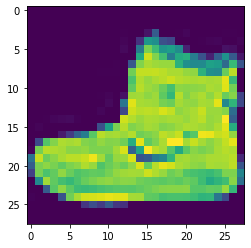

In [17]:
plt.imshow(x_train[0])

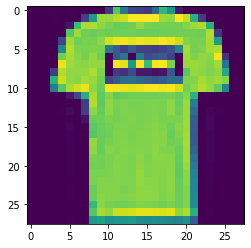

In [18]:
plt.imshow(x_train[1])

### Find dimensions of an image in the dataset

In [19]:
x_train[0].shape

(28, 28)

In [20]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [21]:
pd.Series(y_train).value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

In [22]:
Y_train = keras.utils.to_categorical(y=y_train,num_classes=10,dtype='float32')
Y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
Y_test = keras.utils.to_categorical(y=y_test,num_classes=10,dtype='float32')
Y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Normalize both the train and test image data from 0-255 to 0-1

In [28]:
X_train = x_train/255
X_test = x_test/255


### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [30]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [33]:
print(X_train.shape)
X_test.shape

(60000, 28, 28, 1)


(10000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [35]:
#Define model
model = Sequential()

# 1st Conv Layer
model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model.add(Activation('relu'))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, 
validation_data=(X_test, Y_test), callbacks=callback_list)



d:\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  """
d:\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
d:\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:24: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 22s 362us/step - loss: 0.3797 - accuracy: 0.8615 - val_loss: 0.2894 - val_accuracy: 0.8951
Epoch 2/10
  992/60000 [..............................] - ETA: 10s - loss: 0.2186 - accuracy: 0.9294

d:\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


60000/60000 [==============================] - 11s 183us/step - loss: 0.2405 - accuracy: 0.9113 - val_loss: 0.2714 - val_accuracy: 0.9005
Epoch 3/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.1775 - accuracy: 0.9335 - val_loss: 0.2595 - val_accuracy: 0.9100
Epoch 4/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.1266 - accuracy: 0.9530 - val_loss: 0.2638 - val_accuracy: 0.9150
Epoch 5/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.0867 - accuracy: 0.9686 - val_loss: 0.3023 - val_accuracy: 0.9115
Epoch 6/10
60000/60000 [==============================] - 11s 182us/step - loss: 0.0606 - accuracy: 0.9779 - val_loss: 0.3359 - val_accuracy: 0.9144
Epoch 7/10
60000/60000 [==============================] - 11s 182us/step - loss: 0.0439 - accuracy: 0.9840 - val_loss: 0.3590 - val_accuracy: 0.9168
Epoch 8/10
60000/60000 [==============================] - 11s 182us/step - loss: 0.0297 - accuracy: 0.9891 - val_loss

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [36]:
#Define model
model = Sequential()

# 1st Conv Layer
model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model.add(Activation('relu'))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))

# Added pooling layer of 2X2
model.add(MaxPooling2D(pool_size=(2,2)))

# Added Dropout layer with p=0.25
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, 
validation_data=(X_test, Y_test), callbacks=callback_list)

d:\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  """
d:\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
d:\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.3942 - accuracy: 0.8579 - val_loss: 0.3158 - val_accuracy: 0.8858
Epoch 2/10
 1120/60000 [..............................] - ETA: 8s - loss: 0.2551 - accuracy: 0.9054

d:\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


60000/60000 [==============================] - 9s 155us/step - loss: 0.2624 - accuracy: 0.9027 - val_loss: 0.2543 - val_accuracy: 0.9068
Epoch 3/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.2147 - accuracy: 0.9203 - val_loss: 0.2372 - val_accuracy: 0.9121
Epoch 4/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.1817 - accuracy: 0.9318 - val_loss: 0.2371 - val_accuracy: 0.9136
Epoch 5/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.1557 - accuracy: 0.9405 - val_loss: 0.2292 - val_accuracy: 0.9198
Epoch 6/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.1322 - accuracy: 0.9492 - val_loss: 0.2322 - val_accuracy: 0.9221
Epoch 7/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.1112 - accuracy: 0.9575 - val_loss: 0.2452 - val_accuracy: 0.9177
Epoch 8/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0966 - accuracy: 0.9641 - val_loss: 0.252

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [37]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(X_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

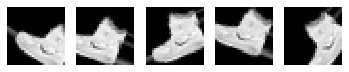

In [39]:
from matplotlib import pyplot as plt
gen = datagen.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [40]:
model.fit_generator(datagen.flow(X_train, Y_train,batch_size=32),
                    samples_per_epoch=X_train.shape[0],
                    nb_epoch=10,
                    validation_data=(X_test, Y_test), callbacks=callback_list)

d:\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
d:\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  after removing the cwd from sys.path.


Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.9285 - accuracy: 0.6583 - val_loss: 0.4505 - val_accuracy: 0.8394
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7000 - accuracy: 0.7390 - val_loss: 0.4517 - val_accuracy: 0.8361
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6304 - accuracy: 0.7650 - val_loss: 0.4315 - val_accuracy: 0.8449
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5882 - accuracy: 0.7812 - val_loss: 0.4166 - val_accuracy: 0.8493
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5589 - accuracy: 0.7926 - val_loss: 0.4103 - val_accuracy: 0.8519
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5404 - accuracy: 0.8013 - val_loss: 0.4046 - val_accuracy: 0.8574
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5197 - accuracy: 0.8064 - val_loss: 0.4219 - val_ac

###  Report the final train and validation accuracy

In [42]:
loss_and_metrics = model.evaluate(X_train, Y_train)
print(loss_and_metrics)

60000/60000 [==============================] - 4s 68us/step
[0.3648089356015126, 0.8667333126068115]


In [44]:
loss_and_metrics_test = model.evaluate(X_test, Y_test)
print(loss_and_metrics_test)

10000/10000 [==============================] - 1s 71us/step
[0.40695613415241244, 0.859000027179718]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [46]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [47]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 62s 0us/step


In [52]:
print(x_train.shape,' - x_train shape')
print(y_train.shape,' - y_train shape')
print(x_test.shape,' - x_test shape')
print(y_test.shape,' - y_test shape')

(50000, 32, 32, 3)  - x_train shape
(50000, 1)  - y_train shape
(10000, 32, 32, 3)  - x_test shape
(10000, 1)  - y_test shape


In [53]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


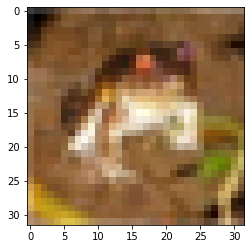

In [58]:
plt.imshow(x_train[0])

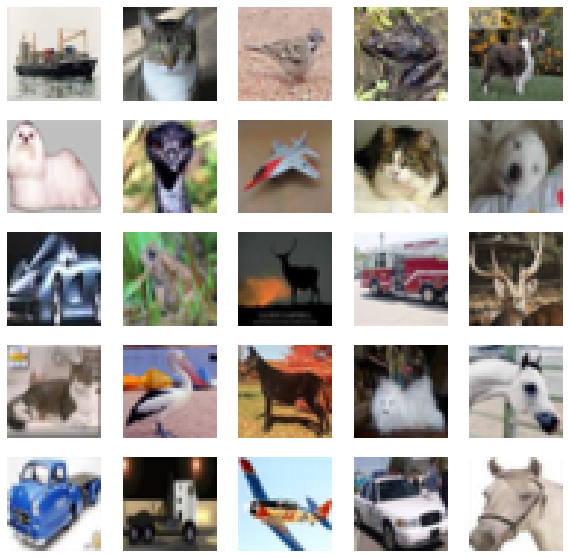

In [88]:
import numpy as np
fig, axes1 = plt.subplots(5,5,figsize=(10,10))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X_train)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X_train[i:i+1][0])

In [62]:
X_train = x_train/255
X_test = x_test/255


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.5,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.5,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images



### **Prepare/fit the generator.**

In [63]:
datagen.fit(X_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

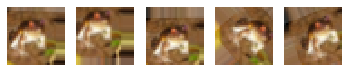

In [73]:
from matplotlib import pyplot as plt
gen = datagen.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()